In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Grafiikan tyyliasetus
plt.style.use('ggplot')

# Näitä käyttäen saan kaavioiden vaaka-akselille siististi päivämääriä viikon välein
from matplotlib.ticker import MultipleLocator
from matplotlib.dates import DateFormatter
myLoc = MultipleLocator(7)
myFmt = DateFormatter('%d.%m')

# Ajantasaisen datan nouto
df = pd.read_excel('https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx')

# Päivämäärät indeksiin
df.index = pd.to_datetime(df['dateRep'])
df = df.drop('dateRep', axis=1).sort_index()
df

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
dateRep,,,,,,,,,,
2019-12-31,31,12,2019,0,0,Nepal,NP,NPL,28087871.0,Asia
2019-12-31,31,12,2019,0,0,Indonesia,ID,IDN,267663435.0,Asia
2019-12-31,31,12,2019,0,0,Switzerland,CH,CHE,8516543.0,Europe
2019-12-31,31,12,2019,0,0,Qatar,QA,QAT,2781677.0,Asia
2019-12-31,31,12,2019,0,0,Canada,CA,CAN,37058856.0,America
...,...,...,...,...,...,...,...,...,...,...
2020-04-24,24,4,2020,3,0,Guam,GU,GUM,165768.0,Oceania
2020-04-24,24,4,2020,0,0,Congo,CG,COG,5244363.0,Africa
2020-04-24,24,4,2020,0,0,Trinidad_and_Tobago,TT,TTO,1389858.0,America


In [2]:
# Maat aakkosjärjestyksessä
np.sort(pd.unique(df['countriesAndTerritories']))

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina',
       'Botswana', 'Brazil', 'British_Virgin_Islands',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia', 'Cuba',
       'CuraÃ§ao', 'Cyprus', 'Czechia',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Eritrea', 'Es

In [17]:
# Vaihda maa ja aja tämän ja seuraavien solujen koodi uudelleen
maa = 'Germany'
df_maa = df[df['countriesAndTerritories'] == maa][['cases', 'deaths']]

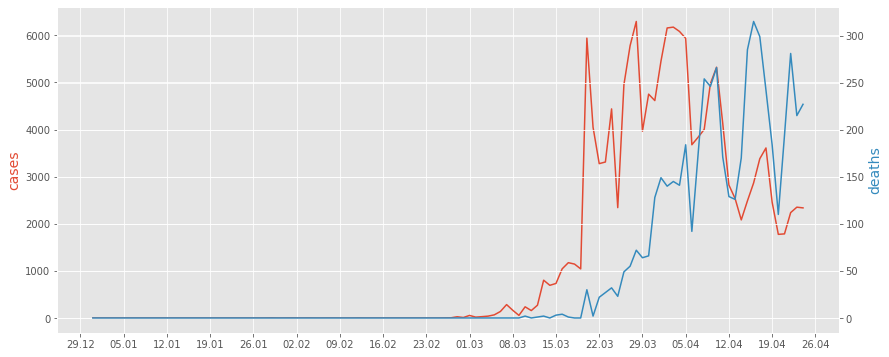

In [18]:
# Päiväkohtaiset arvot vaihtelevat paljon ja tekevät kaavion vaikeaksi tulkita

fig1, ax1 = plt.subplots(figsize = (14, 6))

ax1.set_ylabel('cases', color='C0', fontsize=14)
ax1.plot(df_maa['cases'], color='C0')

ax1_2 = ax1.twinx()

ax1_2.set_ylabel('deaths', color='C1', fontsize=14)
ax1_2.plot(df_maa['deaths'], color='C1')

ax1.xaxis.set_major_locator(myLoc)
ax1.xaxis.set_major_formatter(myFmt)

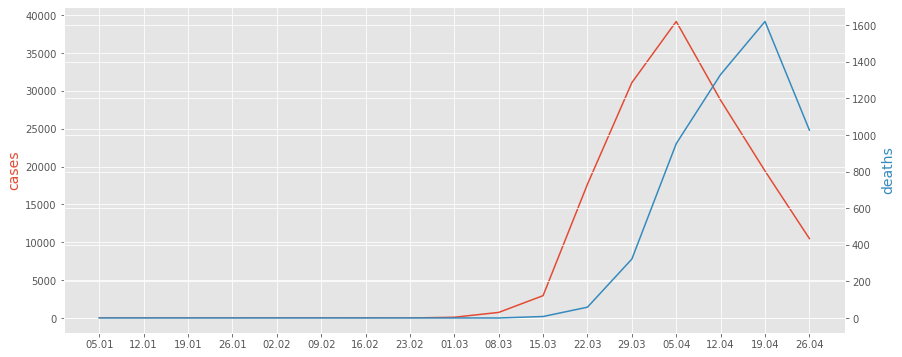

In [19]:
# Paremman kuvan kehityksestä saa viikottaisia määriä tarkastelemalla.
# Tässä pitää huomata, että viimeisen viikon data sisältää keskeneräisestä viikosta vain osan viikosta
# (sisältää koko viikon tiedot vain yhtenä päivänä viikosta).

df_maa_w = df_maa.resample('W').sum()

fig2, ax2 = plt.subplots(figsize = (14, 6))

ax2.set_ylabel('cases', color='C0', fontsize=14)
ax2.plot(df_maa_w['cases'], color='C0')

ax2_2 = ax2.twinx()

ax2_2.set_ylabel('deaths', color='C1', fontsize=14)
ax2_2.plot(df_maa_w['deaths'], color='C1')

ax2.xaxis.set_major_locator(myLoc)
ax2.xaxis.set_major_formatter(myFmt)

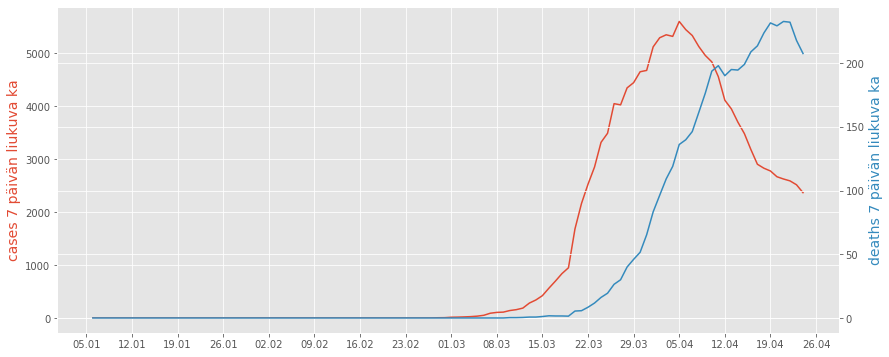

In [20]:
# Päivittäistä vaihtelua voidaan tasoittaa myös liukuvilla keskiarvoilla.
# Tässä on käytetty 7 päivän liukuvia keskiarvoja
# Huomaa, että tässä havainnot eivät kerro kaikkien tartuntojen ja kuolemien määrää,
# vaan viimeisen 7 päivän keskiarvon.

fig3, ax3 = plt.subplots(figsize = (14, 6))

ax3.set_ylabel('cases 7 päivän liukuva ka', color='C0', fontsize=14)
ax3.plot(df_maa['cases'].rolling(7).mean(), color='C0')

ax3_2 = ax3.twinx()

ax3_2.set_ylabel('deaths 7 päivän liukuva ka', color='C1', fontsize=14)
ax3_2.plot(df_maa['deaths'].rolling(7).mean(), color='C1')

ax3.xaxis.set_major_locator(myLoc)
ax3.xaxis.set_major_formatter(myFmt)